In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

dumps = pd.read_csv("illegaldumpsites.csv")
dumps.head()

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN


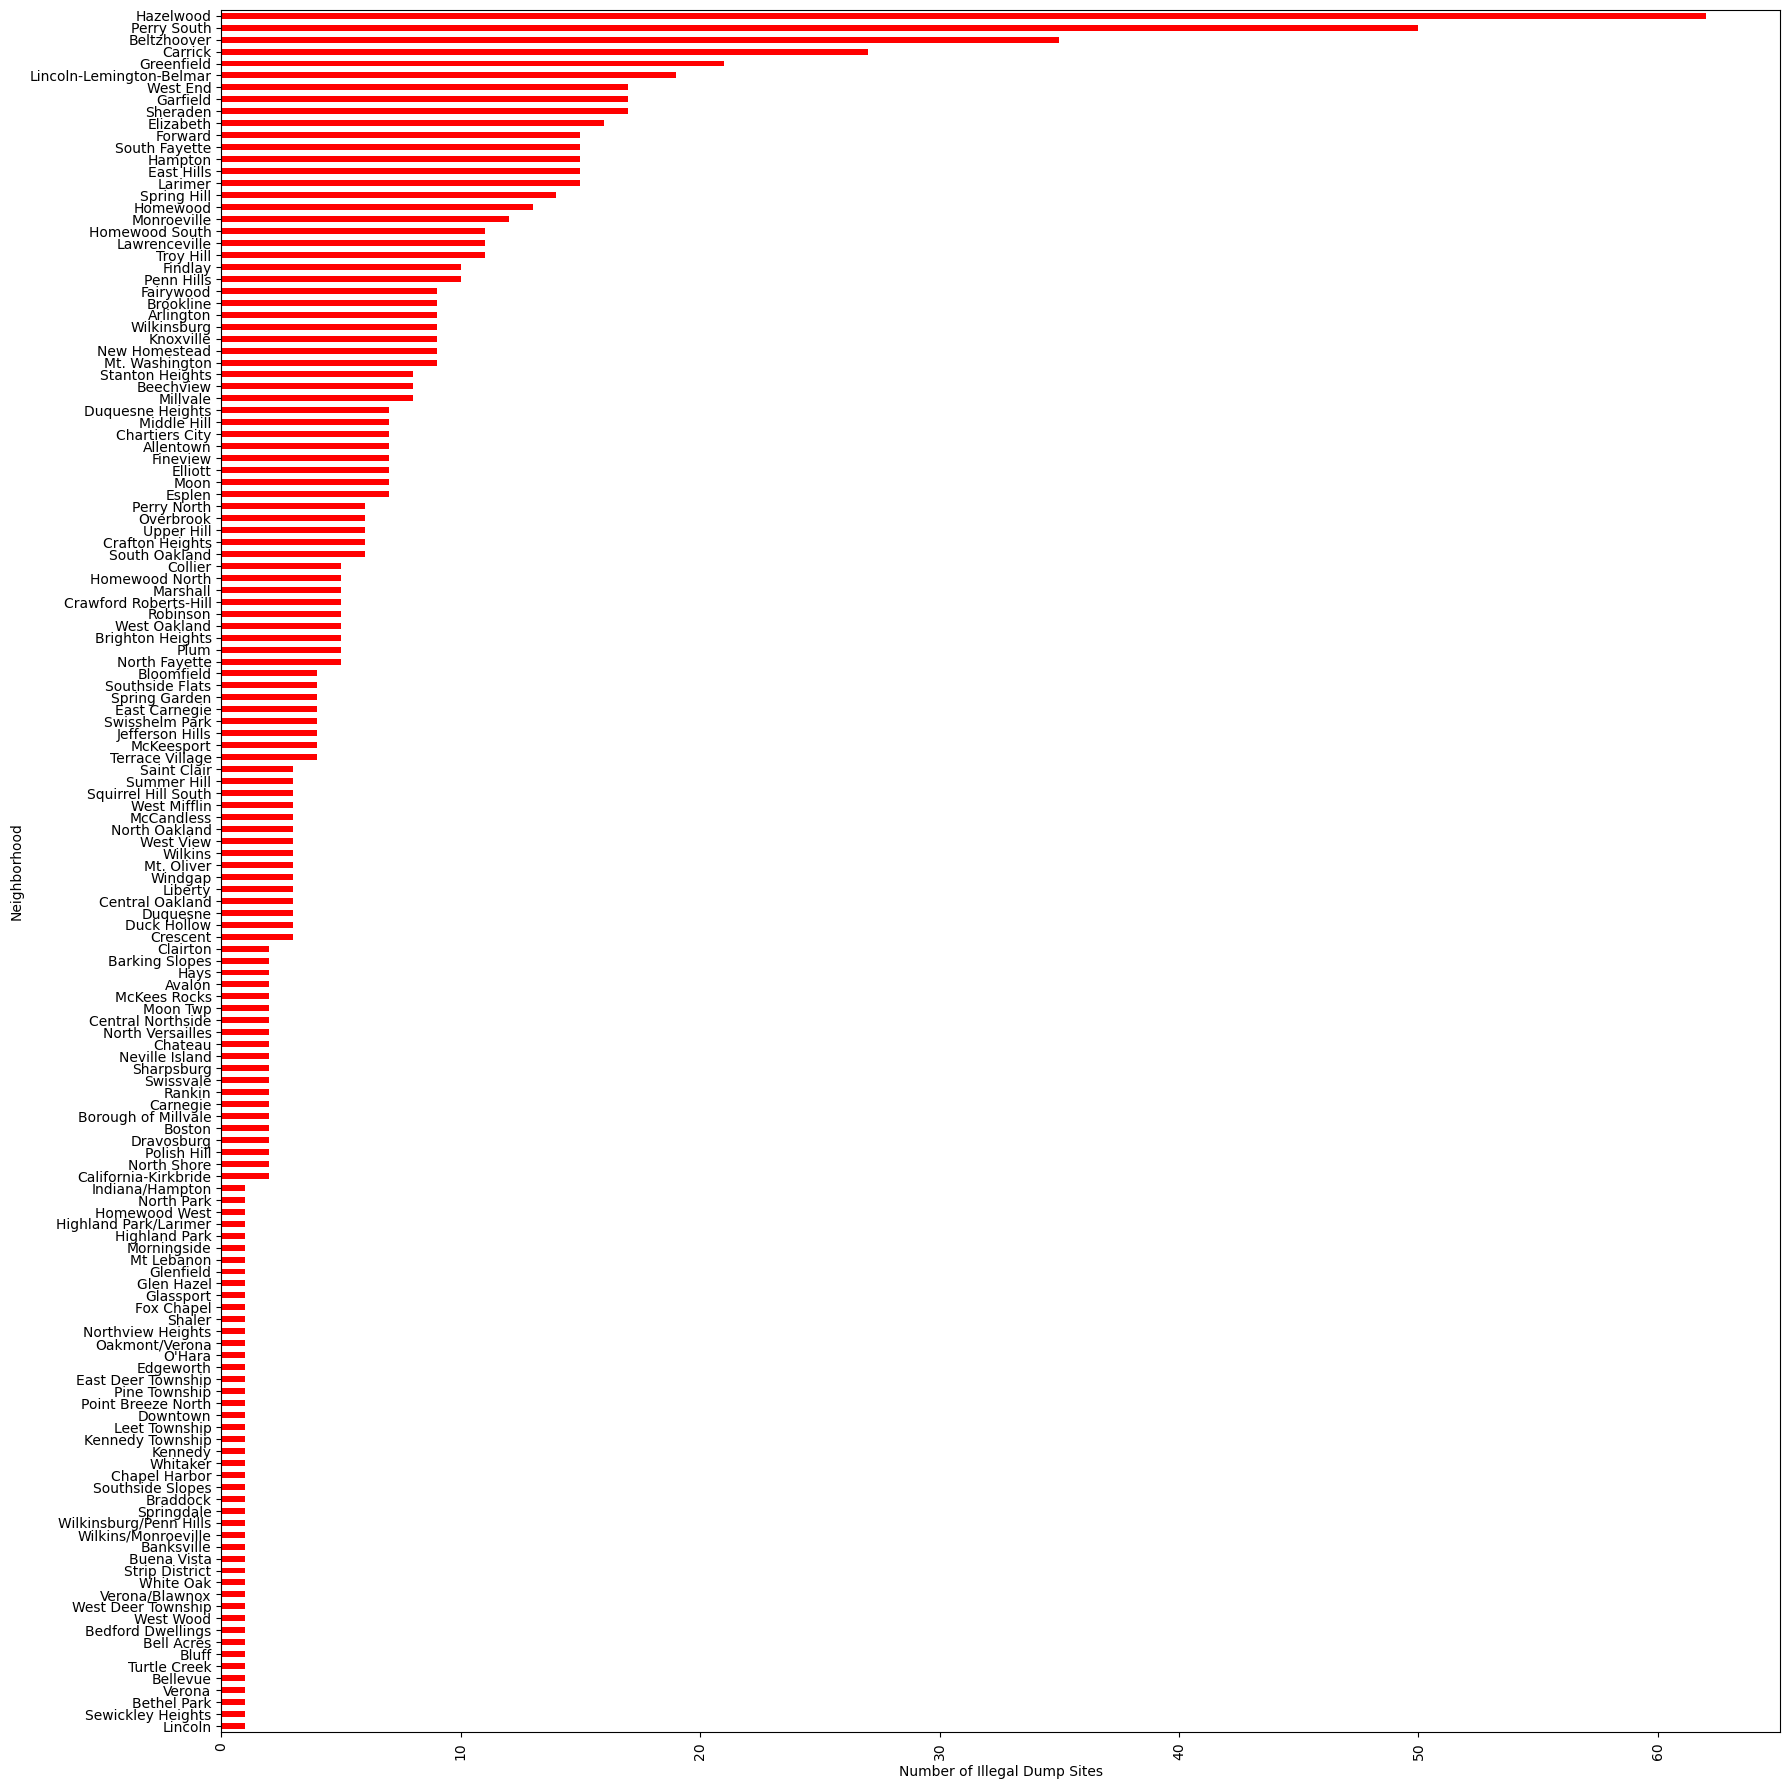

In [86]:
# find out what neighborhoods have the most illegal dump sites
dumps['estimated_tons'] = pd.to_numeric(dumps['estimated_tons'], errors='coerce')
query_mask = dumps['estimated_tons'] > 0
illegal_dumps = dumps[query_mask]
neighborhood_counts = illegal_dumps['Neighborhood'].value_counts()
neighborhood_counts = neighborhood_counts.sort_values(ascending=True)
plt.figure(figsize=(18,18))
neighborhood_counts.plot(kind='barh', color='red')
plt.xlabel('Number of Illegal Dump Sites')
plt.ylabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

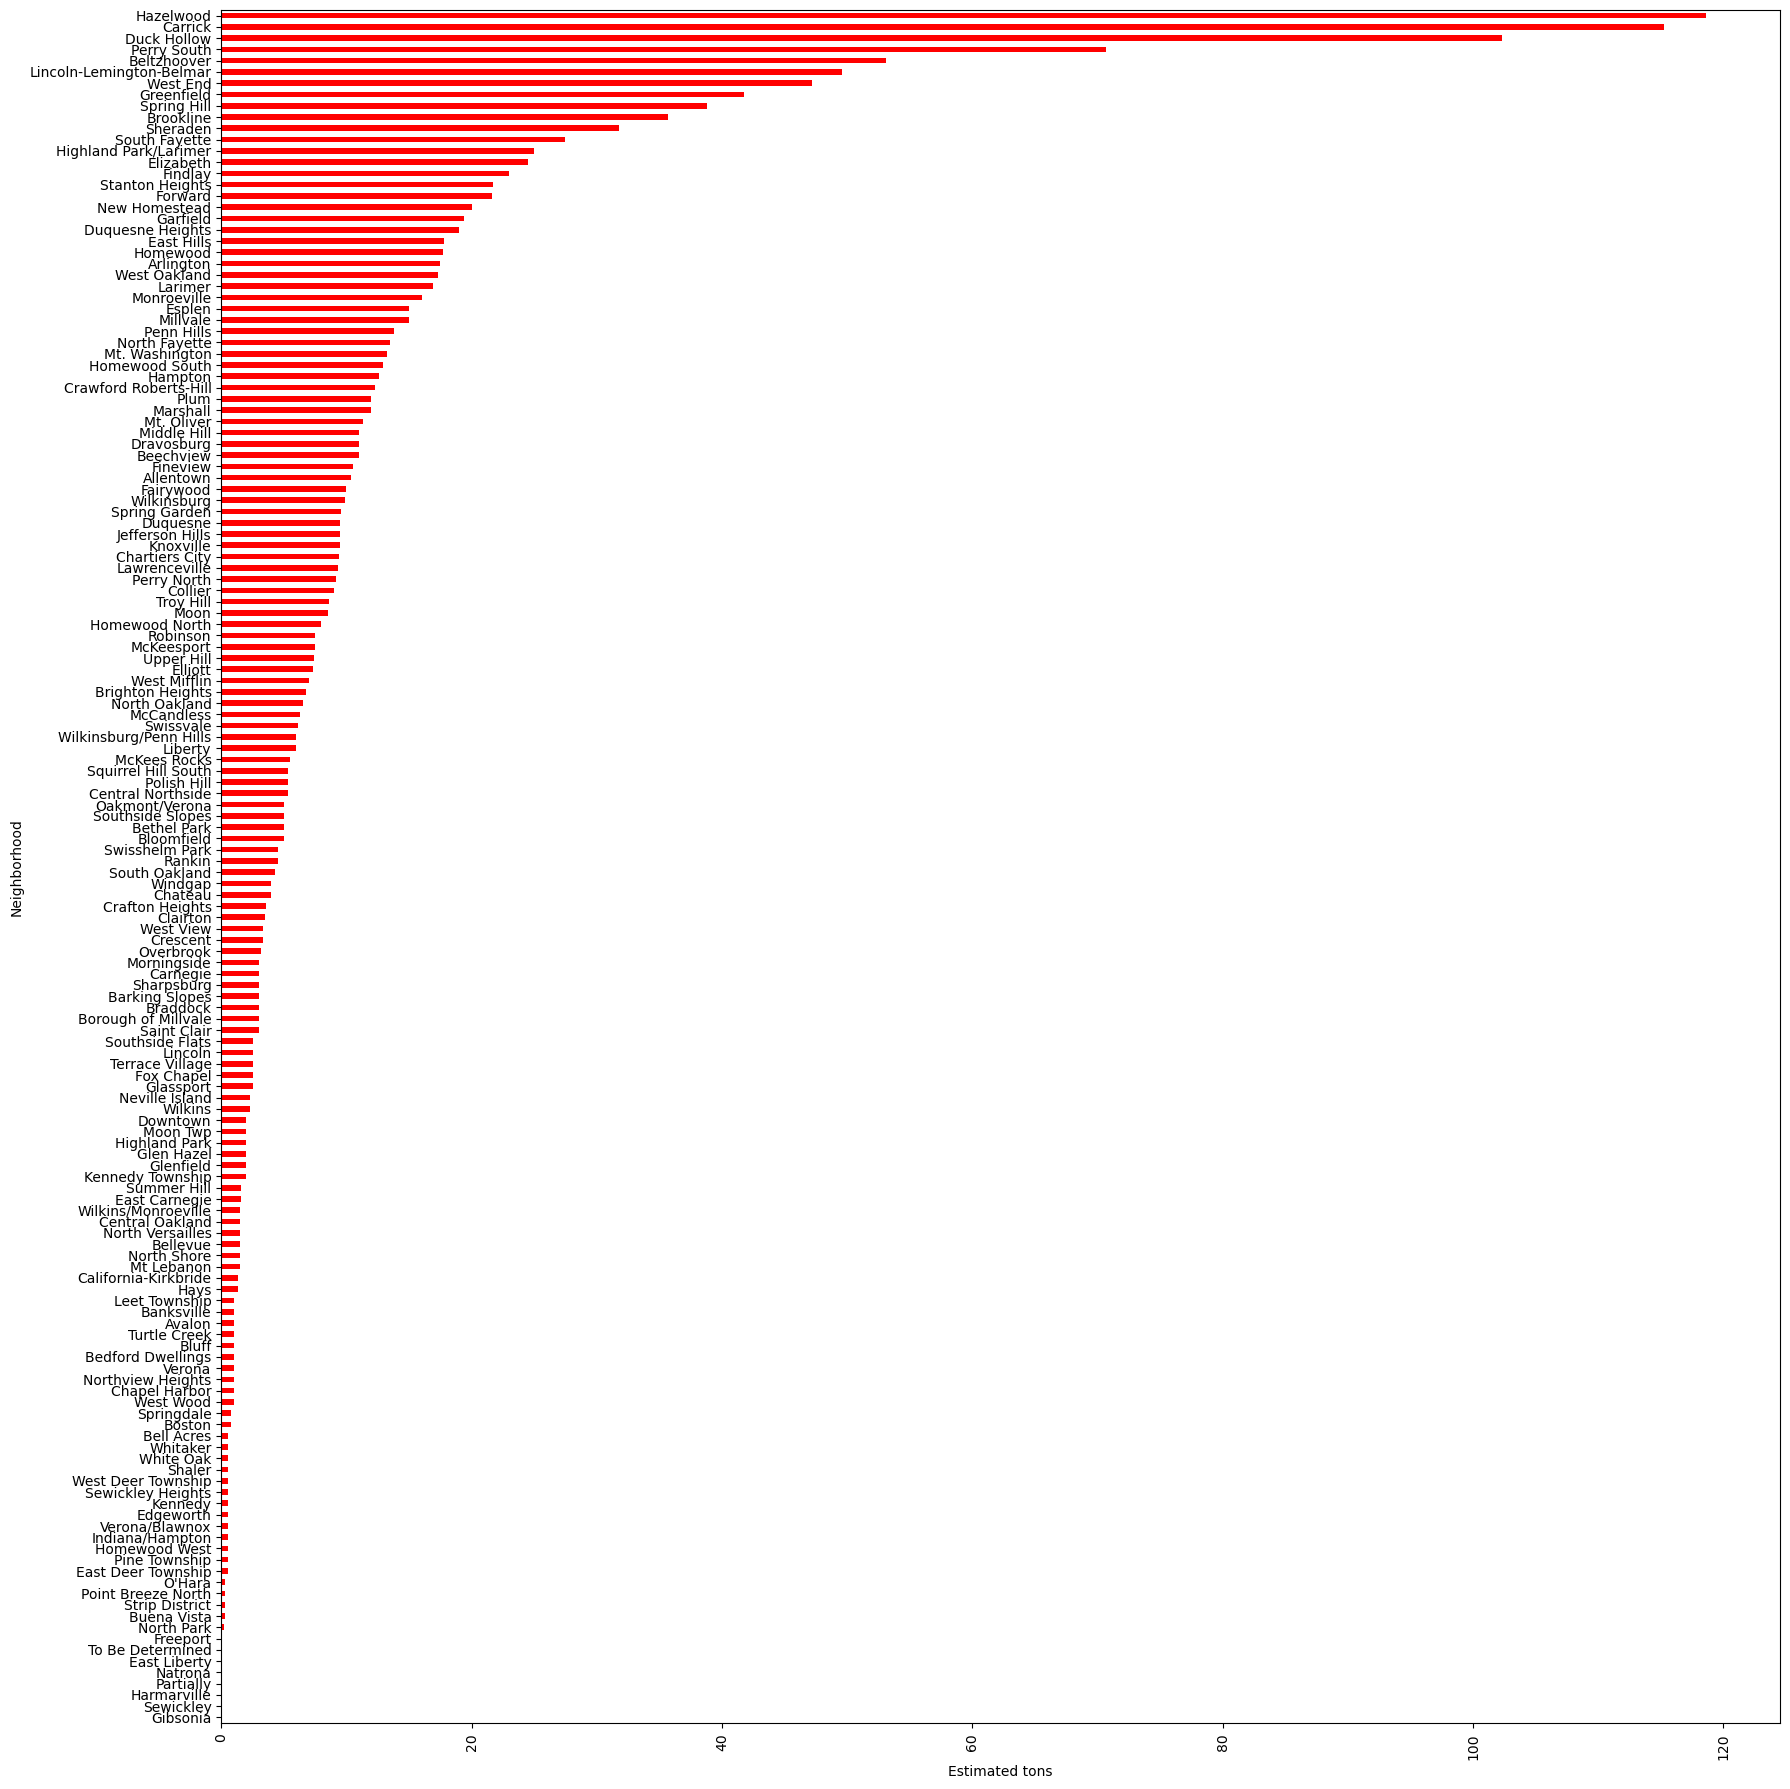

In [84]:
# find out what neighborhoods have the most illegaly dumped stuff

weights = dumps.groupby('Neighborhood')['estimated_tons'].sum()
weights = weights.sort_values(ascending=True)
plt.figure(figsize=(18,18))
weights.plot(kind='barh', color='red')
plt.xlabel('Estimated tons')
plt.ylabel('Neighborhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# see where has the highest average estimated tons

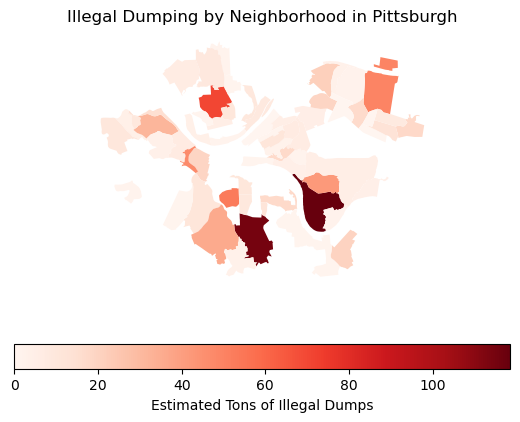

In [29]:
# map out all neighborhoods
neighborhoods = gpd.read_file("Neighborhoods_.shp")

dumps_map = neighborhoods.merge(weights, how='left', left_on='hood', right_on='Neighborhood')

dumps_map.plot(column='estimated_tons', cmap='Reds', legend=True, 
         legend_kwds={'label': "Estimated Tons of Illegal Dumps",
                      'orientation': "horizontal"})
plt.title("Illegal Dumping by Neighborhood in Pittsburgh")
plt.axis('off')
plt.show()

**Conclusion**

After analyzing this data, Hazelwood was the neighborhood with both the largest amount of sites containing illegally dumped trash and the largest estimated amount (tons) of trash dumped. With this in mind, this data clearly shows that Hazelwood has the worst trash situation in Pittsburgh. Carrick, Duck Hollow, Perry South, Beltzhoover, and Lincoln-Lemington-Belmar all also displayed struggles with illegal dumping, as these neighborhoods also had high amounts of illegal dump sites and estimated lbs dumped.